## 2022년도 도전학기 '빅데이터와 인공지능을 활용한 시스템 강건설계' 데이터 챌린지

#### - 데이터 챌린지 목표: 빅데이터 핸들링 능력, 데이터 특징 추출 및 선택 능력 평가
#### - 제공 데이터 구성 : 정상/고장 각각의 센서데이터 및 기록데이터
#### - 총 3단계의 데이터 챌린지를 수행하며, 단계별 결과가 저장된 폴더(Result) 내의 결과물을 1개 압축파일(.zip)로 제출

.

.

.

## 라이브러리 import

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

import scipy.stats as sp
import pywt

## 센서데이터, 기록데이터 보기

### - 센서데이터 :
* 전류 / 전압 / 가속도 3열로 구성(시간열 없음)
* 샘플링 주파수: 12800Hz
* 데이터 시작 시간: 0초 - (정상/고장 데이터 모두 0행의 시간은 0초)
* 정상/고장 각각 120개의 용접 Spot 포함됨
* 각 용접 Spot 별 용접 소요 시간 약 0.2167초

### - 기록데이터 :
* 정상/고장 센서데이터의 Spot 별 용접 시작 시점이 초(second) 단위로 기록됨

### 데이터 살펴보기

In [2]:
# 센서데이터
NormalData   = pd.read_csv('./Data/NormalData',   header = None, names = ['Current', 'Voltage', 'Acceleration'])
AbnormalData = pd.read_csv('./Data/AbnormalData', header = None, names = ['Current', 'Voltage', 'Acceleration'])

# 기록데이터
NormalRecord   = pd.read_csv('./Data/NormalRecord',   header = None)
AbnormalRecord = pd.read_csv('./Data/AbnormalRecord', header = None)

In [3]:
NormalData

,Current,Voltage,Acceleration
0,0.001073,0.009074,-0.075739
1,0.001174,0.030515,-0.070865
2,0.001257,0.004781,-0.077989
3,0.001182,-0.026037,-0.071990
4,0.001039,-0.020050,-0.068615
...,...,...,...
3225721,0.003956,-0.011292,0.044613
3225722,0.004057,-0.006789,0.031116
3225723,0.004069,-0.012165,0.029991
3225724,0.003874,0.010734,0.032990


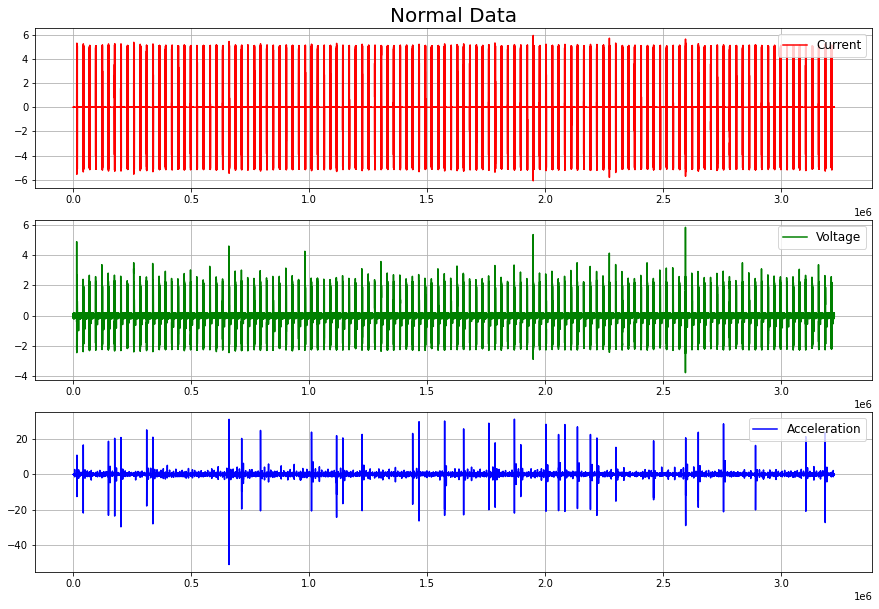

In [4]:
plt.figure(1, figsize=(15,10))

# 전류데이터 Plot
plt.subplot(3,1,1)
plt.plot(NormalData.iloc[:,0], c = 'r', label = NormalData.columns[0])
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Normal Data', fontsize = 20)
plt.grid()
# 전압데이터 Plot
plt.subplot(3,1,2)
plt.plot(NormalData.iloc[:,1], c = 'g', label = NormalData.columns[1])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
# 가속도데이터 Plot
plt.subplot(3,1,3)
plt.plot(NormalData.iloc[:,2], c = 'b', label = NormalData.columns[2])
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid()
plt.show()

In [5]:
NormalRecord

,0
0,1.093750
1,3.194375
2,5.278516
3,7.346094
4,9.430312
...,...
115,242.484531
116,244.617422
117,246.783906
118,248.900313


.

.

.

# [1단계] 기록데이터 활용 센서데이터 분할(15점)
> #### 기록데이터 상 각각의 용접 시작 시점부터 <font color=red>용접 소요 시간</font>만큼(<font color=red>2774행≒0.2167초</font> 간) 해당 센서데이터 Spot별로 분할, 저장
> #### 저장 경로 : 이 코드 파일이 위치한 경로의 ' SplitData' 폴더 내부
> #### <font color=red>★ 주의: 분할된 센서 데이터는 분할 전과 동일하게 센서 종류 3열로 구성</font>

## 필수!

#### SplitData 폴더 내부 각 데이터 파일명:
* 정상(Normal) : Normal_1, Normal_2, Normal_3, ..., Normal_120
* 고장(Abnormal) : Abnormal_1, Abnormal_2, Abnormal_3, ..., Abnormal_120

#### 데이터 분할을 위한 시간열 만들기

In [6]:
# 센서데이터 시간열 만들기 (변수명 수정 x)
Fs = 12800 # 샘플링 주파수

NormalData_time   = np.arange(0, 3225726 * (1/Fs), 1/Fs)
AbnormalData_time = np.arange(0, 3200639 * (1/Fs), 1/Fs)

#### Normal 및 Abnormal 데이터 분할

! 힌트 : np.round(5) or array.round(5) 활용

In [7]:
# 시간열 이용하여 분할

# 정상 데이터
for i in range(NormalRecord.shape[0]):
    Start_index = np.where(NormalData_time.round(5) == NormalRecord.iloc[i][0].round(5))
    
    SplitNormal = NormalData.iloc[Start_index[0][0]:Start_index[0][0]+2774]
    path = './SplitData/Normal_%d'%(i+1)
    SplitNormal.to_csv(path , sep=',' , header=None , index=None)

# 고장 데이터
for i in range(AbnormalRecord.shape[0]):
    Start_index = np.where(AbnormalData_time.round(5) == AbnormalRecord.iloc[i][0].round(5))
    
    SplitAbnormal = AbnormalData.iloc[Start_index[0][0]:Start_index[0][0]+2774]
    path = './SplitData/Abnormal_%d'%(i+1)
    SplitAbnormal.to_csv(path , sep=',' , header=None , index=None)

### 1단계 결과물을 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [8]:
StudentNo = 136   # 수강생 번호 입력

NormalResult     = pd.read_csv('./SplitData/Normal_80', header=None)
AbnormalResult   = pd.read_csv('./SplitData/Abnormal_60', header=None)
temp_Normal_time = pd.DataFrame(NormalData_time)

Path1 = './Result/ST%d_DC1_1'%StudentNo
Path2 = './Result/ST%d_DC1_2'%StudentNo
Path3 = './Result/ST%d_DC1_3'%StudentNo

temp_Normal_time.to_csv(Path1, header=None, index=None)
NormalResult.to_csv(    Path2, header=None, index=None)
AbnormalResult.to_csv(  Path3, header=None, index=None)

.

.

.

# [2단계] 데이터 특징 추출(10점)

> ### 1단계에서 분할한 정상/고장 데이터 모두 불러와서 <font color=red>시간 영역</font>에서만 특징 추출

## 필수!
* 1단계에서 추출한 데이터에 대하여 각 센서(열) 별로 아래 10개 특징값 순서대로 추출
* 특징값 종류 및 순서(실습코드와 동일) : Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Impulse factor, Shape factor
* 추출된 특징데이터(DataFrame) 변수 이름: FeatureData
* 행 순서: 전류-Max, 전류-Min, ..., 전압-Max, 전압-Min, ..., 가속도-Max, 가속도-Min, ...
* 열 순서: Normal_1, Normal_2, ..., Abnormal_1, Abnormal_2, ...

In [9]:
NoOfData    = 120   # 정상/고장 데이터 각 120개씩 
NoOfSensor  = 3     # 전류(Current), 전압(Voltage), 가속도(Acceleration)
NoOfFeature = 10    # 특징 개수:10개 (순서: Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Impulse factor, Shape factor)

In [10]:
def rms(x): # RMS 함수 정의
    return np.sqrt(np.mean(x**2))

# 특징값 추출

# 특징데이터 크기 지정
TimeFeature_Normal = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal = np.zeros((NoOfSensor*NoOfFeature , NoOfData))

for i in range(NoOfData):
    
    # 데이터 불러오기
    temp_path1 = './SplitData/Normal_%d'%(i+1)   # Normal 데이터 파일 경로
    temp_path2 = './SplitData/Abnormal_%d'%(i+1) # Abnormal 데이터 파일 경로
    temp_data1 = pd.read_csv(temp_path1 , sep=',' , header=None).iloc[:,0:] # 임시 Normal 데이터
    temp_data2 = pd.read_csv(temp_path2 , sep=',' , header=None).iloc[:,0:] # 임시 Abnormal 데이터
    
    
    # Time Domain 특징값 추출
    for j in range(NoOfSensor):
        
        # Normal Time Domain Feature
        TimeFeature_Normal[10*j+0, i] = np.max(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+1, i] = np.min(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+2, i] = np.mean(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+3, i] = rms(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+4, i] = np.var(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+5, i] = sp.skew(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+6, i] = sp.kurtosis(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+7, i] = np.max(temp_data1.iloc[:,j])/rms(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+8, i] = np.max(temp_data1.iloc[:,j])/np.mean(temp_data1.iloc[:,j])
        TimeFeature_Normal[10*j+9, i] = rms(temp_data1.iloc[:,j])/np.mean(temp_data1.iloc[:,j])
            
        # Abnormal Time Domain Feature
        TimeFeature_Abnormal[10*j+0, i] = np.max(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+1, i] = np.min(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+2, i] = np.mean(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+3, i] = rms(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+4, i] = np.var(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+5, i] = sp.skew(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+6, i] = sp.kurtosis(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+7, i] = np.max(temp_data2.iloc[:,j])/rms(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+8, i] = np.max(temp_data2.iloc[:,j])/np.mean(temp_data2.iloc[:,j])
        TimeFeature_Abnormal[10*j+9, i] = rms(temp_data2.iloc[:,j])/np.mean(temp_data2.iloc[:,j])

In [11]:
# 시간영역 특징 합치기(가로 방향)
TimeFeature = np.concatenate([TimeFeature_Normal, TimeFeature_Abnormal] , axis=1)
FeatureData = pd.DataFrame(TimeFeature)

### 2단계 결과물 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [12]:
# StudentNo = 136   # 수강생 번호 입력

Path1 = './Result/ST%d_DC2'%StudentNo
FeatureData.to_csv(Path1, header=None, index=None)

.

.

.

# [3단계] t-Test 기반 주요 특징 선택(10점)

## 필수!
* 정상/고장의 각 특징 별 t-Test 수행, P-value 오름차순 기준 상위 10개 주요 특징 선택하여 저장
* 선택된 특징데이터(DataFrame) 변수 이름: FeatureSelected

#### 특징데이터 분리: 정상, 고장

In [13]:
NoOfData = int(FeatureData.shape[1]/2)
Normal_FeatureData   = FeatureData.iloc[:,:NoOfData]
Abnormal_FeatureData = FeatureData.iloc[:,NoOfData:]

#### t-Test 수행, P-value 기준 정렬

In [14]:
NoOfFeature = FeatureData.shape[0] # 추출된 Feature 갯수

P_value = np.zeros((NoOfFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[i,:] , Abnormal_FeatureData.iloc[i,:]))
    P_value[i,0] = i          # Feature Index
    P_value[i,1] = T_test[1]  # P값 (P-value)
    
P_value      = pd.DataFrame(P_value)
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

P_value_Rank

,0,1
14,14.0,1.726412e-106
13,13.0,4.168146e-106
22,22.0,2.645262e-66
15,15.0,4.670393e-26
6,6.0,5.497632e-21
29,29.0,3.978677e-19
11,11.0,6.326357e-19
17,17.0,1.398986e-18
23,23.0,1.003415e-16
9,9.0,1.194194e-13


#### P-value 기준 특징 선택

In [15]:
Rank = 10

Normal   = np.zeros((Rank,NoOfData))
Abnormal = np.zeros((Rank,NoOfData))

for i in range(Rank):
    
    index         = int(P_value_Rank.iloc[i,0])
    Normal[i,:]   = Normal_FeatureData.iloc[index,:].values
    Abnormal[i,:] = Abnormal_FeatureData.iloc[index,:].values

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=1))

### 3단계 결과물 제출용 파일로 저장(수강생 번호 외 코드 수정 X)

In [16]:
# StudentNo = 136   # 수강생 번호 입력

Path1 = './Result/ST%d_DC3_1'%StudentNo
Path2 = './Result/ST%d_DC3_2'%StudentNo

FeatureSelected.to_csv(Path1, header=None, index=None)
P_value_Rank.to_csv(Path2, header=None, index=None)

.

.

.

# [최종] 해당 코드 파일을 .py 확장자로 변환

### 1. 해당 코드 파일명의 마지막에 본인 수강생 번호로 변경(ex: 수강생 번호 13번일 경우, DataChallenge_ST-13)
### 2. 메뉴바에서 File > Download as > Python (.py) 선택하여 .py 확장자로 변환
### 3. Download 폴더에서 저장되어 있는 .py 파일을 Result 폴더에 넣기

# ● 결과가 저장된 폴더(Result) 내의 모든 파일을 하나의 zip파일로 제출
> #### 압축파일 이름 ST(수강생번호)_DC (예시: 한 자리 수 'ST0_DC', 두 자리 수 'ST00_DC', 세 자리 수 'ST000_DC',)
> #### SplitData 폴더는 압축 필요 없음!